In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [43]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

# Numero de Pessoas Feridas 


In [4]:
mediaNumeroFeridos = pd.DataFrame(df,columns=['n_injured'])
mediaNumeroFeridos.mean()

n_injured    0.494007
dtype: float64

In [5]:
df.n_injured.mean()

0.4940065171042695

# 5 estados com mais crimes a mão armada

<AxesSubplot:>

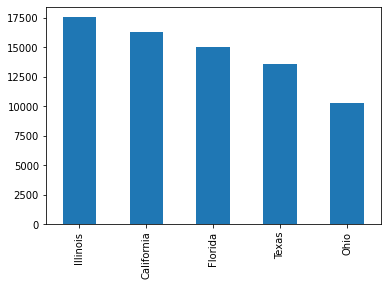

In [2]:
df["state"].value_counts().head().plot.bar()

# Top 10 armas ("descobertas") mais utilizadas

<AxesSubplot:ylabel='gun_type'>

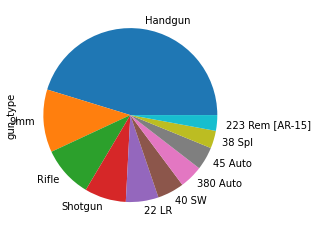

In [3]:

#retirando missing data
b = pd.DataFrame(df.gun_type.dropna())

#tratando dados das linhas
d = pd.DataFrame(b.apply(lambda x: x.str.split('\|\|').explode()), columns=['gun_type'])
d = pd.DataFrame(d.apply(lambda x: x.str.split('::').explode()).reset_index().gun_type)
d = pd.DataFrame(d.apply(lambda x: x.str.split('\|').explode()))
d = pd.DataFrame(d.apply(lambda x: x.str.split(':').explode()).reset_index().gun_type)

#apos o split apenas as linhas impares tem os nomes das armas
d = pd.DataFrame(d[d["gun_type"].index % 2 != 0].gun_type)

#plotando grafico de pizza
d[d.gun_type != 'Unknown'].gun_type.value_counts().head(10).plot.pie()


# Locais públicos com maior incidência de crimes
### Dentre dos que foram relatados o local

In [21]:
locaisPublicos = pd.DataFrame(pd.DataFrame(df,columns=['location_description']).dropna().location_description.value_counts().head(10))
locaisPublicos

,location_description
Austin,240
Walmart,232
7-Eleven,166
Motel 6,152
McDonald's,150
Dallas/Ft Worth Intl Airport (DFW),132
WalMart,119
Dollar General,107
Lawndale,103
Shell,103


/home/ubiratan/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


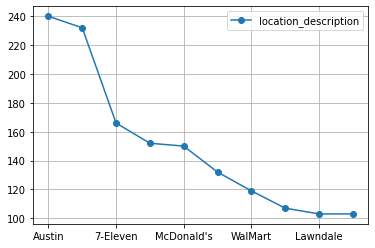

In [22]:
locaisPublicos.plot(marker='o').grid()

# Número de criminosos com +18 vs. -18

In [38]:
participants = pd.DataFrame(df,columns=['participant_age_group','participant_type']).dropna()


In [39]:

participantsGroupDistintos = []
for i in range(participants.shape[0]):
    ageGroupPorLinha = participants.values[i][0]
    typePorLinha = participants.values[i][1]
    
    ageGroupSeparados = ageGroupPorLinha.split('||')
    typeSeparados = typePorLinha.split('||')
    
    for j in range(len(ageGroupSeparados)):
        if("Victim" not in typeSeparados[j]):
            if("::" in ageGroupSeparados[j]):
                participantsGroupDistintos.append(ageGroupSeparados[j].split('::')[1])


In [40]:
participantsDF = pd.DataFrame(participantsGroupDistintos,columns=['Faixa_Etaria'])

adultos = participantsDF[participantsDF.Faixa_Etaria == 'Adult 18+'].Faixa_Etaria.value_counts().sum()
menores = participantsDF[participantsDF.Faixa_Etaria != 'Adult 18+'].Faixa_Etaria.value_counts().sum()
faixaEtaria = [adultos,menores]
pd.DataFrame(faixaEtaria,columns=['Quantidade'], index=['Adultos','Menores'])
#Procurar um gráfico que melhore a visu

,Quantidade
Adultos,144462
Menores,13063
